In [3]:
import urllib.request
from threading import Thread
import time
import random
from bs4 import BeautifulSoup
import re
import matplotlib.pyplot as plt

In [4]:
def downloadUrl ( url):	
    request = urllib.request.Request(url,headers={'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/35.0.1916.47 Safari/537.37'})
    result = urllib.request.urlopen(request,timeout=30)
    resulttext = result.read()
    return resulttext, result.getheaders()

In [5]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [6]:
def getCases ( html, start_point=20 ):
    
    prev = start_point
    cases_raw = re.findall(r"(?sm)'coronavirus-cases-linear',(.*?)\);",html.decode(),re.DOTALL)[0]
    data_raw = re.findall(r"(?sm) data:(.*?)]",cases_raw,re.DOTALL)[0]
    data = re.findall(r"(\d{1,7})",data_raw)

    new = []
    cases = []
    for d in data:
        if(int(d)>start_point):
            cases.append(int(d))
            new.append(int(d)- prev)
            prev = int(d)
        
    return cases , new


def getDeaths ( html, start_point=0 ):
    
    prev = start_point
    cases_raw = re.findall(r"(?sm)'coronavirus-deaths-linear',(.*?)\);",html.decode(),re.DOTALL)[0]
    data_raw = re.findall(r"(?sm) data:(.*?)]",cases_raw,re.DOTALL)[0]
    data = re.findall(r"(\d{1,7})",data_raw)

    new = []
    cases = []
    for d in data:
        if(int(d)>start_point):
            cases.append(int(d))
            new.append(int(d)- prev)
            prev = int(d)
        
    return cases , new



In [7]:
countries = [
    'https://www.worldometers.info/coronavirus/country/poland/',
    'https://www.worldometers.info/coronavirus/country/spain/',
    'https://www.worldometers.info/coronavirus/country/italy/',
    'https://www.worldometers.info/coronavirus/country/japan/',
    'https://www.worldometers.info/coronavirus/country/uk/',
    'https://www.worldometers.info/coronavirus/country/us/',
    'https://www.worldometers.info/coronavirus/country/china/',
    'https://www.worldometers.info/coronavirus/country/sweden/',
]

labels = [
    'poland',
    'spain',
    'italy',
    'japan',
    'uk',
    'usa',
    'china',
    'sweeden',
]


cases = []
new_cases = []
deaths = []
new_deaths = []

for c in countries:
    html , headers = downloadUrl(c)

    case , new =getCases (html)
    cases.append(case)
    new_cases.append(new)

    death , new = getDeaths (html)    
    deaths.append(death)
    new_deaths.append(new)
    

2020-04-11 13:24


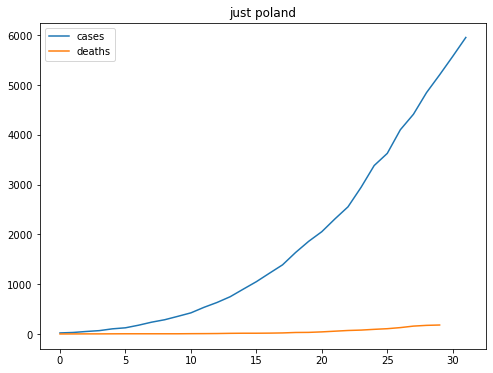

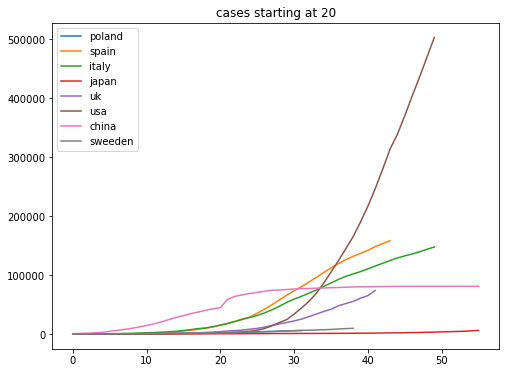

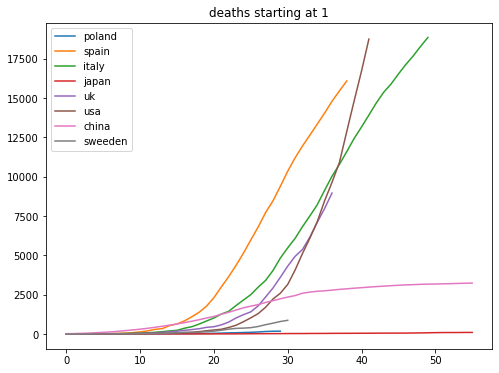

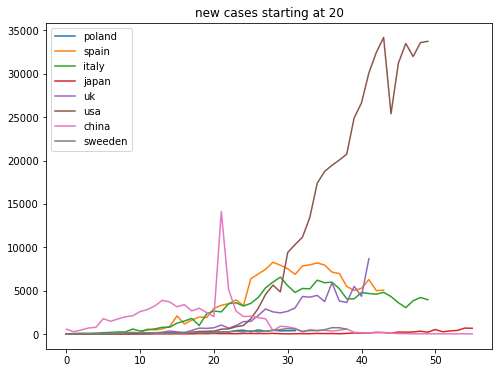

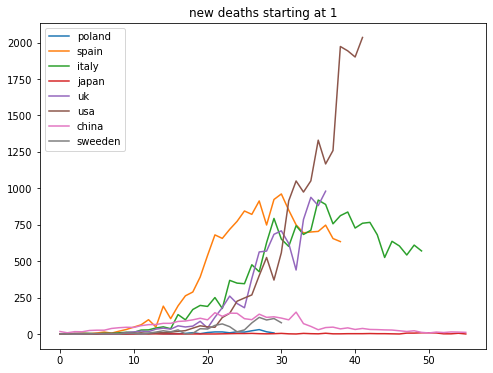

In [8]:
import datetime
print (datetime.datetime.now().strftime("%Y-%m-%d %H:%M"))

lenght = len(cases[3])  #reference country

plt.rcParams['figure.figsize'] = [8, 6]

plt.title('just poland')
plt.plot(cases[0],label='cases')
plt.plot(deaths[0],label='deaths')
plt.legend(loc="upper left")
plt.show()



plt.title('cases starting at 20')
# for case in cases:
for i, case in enumerate(cases):
    plt.plot(case[:lenght],label=labels[i])

plt.legend(loc="upper left")
plt.show()



plt.title('deaths starting at 1')
# for case in cases:
for i, death in enumerate(deaths):
    plt.plot(death[:lenght],label=labels[i])

plt.legend(loc="upper left")
plt.show()


plt.title('new cases starting at 20')
# for case in cases:
for i, death in enumerate(new_cases):
    plt.plot(death[:lenght],label=labels[i])

plt.legend(loc="upper left")
plt.show()

plt.title('new deaths starting at 1')
# for case in cases:
for i, death in enumerate(new_deaths):
    plt.plot(death[:lenght],label=labels[i])

plt.legend(loc="upper left")
plt.show()